In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('ex1data1.txt')
df.columns = ['population', 'profit']

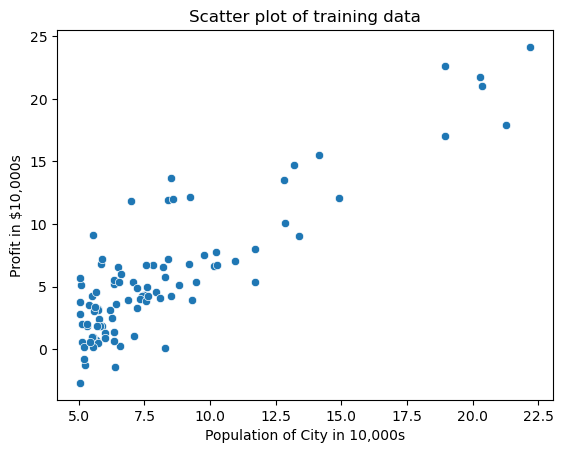

In [4]:
ax = sns.scatterplot(x='population', y='profit', data=df)
ax.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s', title='Scatter plot of training data');

In [5]:
m = df.shape[0]
X = np.hstack((np.ones((m,1)), df.population.values.reshape(-1,1)))
y = np.array(df.profit.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))

iterations = 1500
alpha = 0.01

In [6]:
m, X

(96,
 array([[ 1.    ,  5.5277],
        [ 1.    ,  8.5186],
        [ 1.    ,  7.0032],
        [ 1.    ,  5.8598],
        [ 1.    ,  8.3829],
        [ 1.    ,  7.4764],
        [ 1.    ,  8.5781],
        [ 1.    ,  6.4862],
        [ 1.    ,  5.0546],
        [ 1.    ,  5.7107],
        [ 1.    , 14.164 ],
        [ 1.    ,  5.734 ],
        [ 1.    ,  8.4084],
        [ 1.    ,  5.6407],
        [ 1.    ,  5.3794],
        [ 1.    ,  6.3654],
        [ 1.    ,  5.1301],
        [ 1.    ,  6.4296],
        [ 1.    ,  7.0708],
        [ 1.    ,  6.1891],
        [ 1.    , 20.27  ],
        [ 1.    ,  5.4901],
        [ 1.    ,  6.3261],
        [ 1.    ,  5.5649],
        [ 1.    , 18.945 ],
        [ 1.    , 12.828 ],
        [ 1.    , 10.957 ],
        [ 1.    , 13.176 ],
        [ 1.    , 22.203 ],
        [ 1.    ,  5.2524],
        [ 1.    ,  6.5894],
        [ 1.    ,  9.2482],
        [ 1.    ,  5.8918],
        [ 1.    ,  8.2111],
        [ 1.    ,  7.9334],
        [ 1.   

In [8]:
def compute_cost_one_variable(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * (np.sum((h - y)**2))
    return J

In [9]:
J = compute_cost_one_variable(X, y, theta)
print('With theta = [0 ; 0]\nCost computed =', J)
print('Expected cost value (approx) 32.07')

With theta = [0 ; 0]
Cost computed = 30.79495785534583
Expected cost value (approx) 32.07


In [12]:
J = compute_cost_one_variable(X, y, [[-1],[2]])
print('With theta = [-1 ; 2]\nCost computed =', J)
print('Expected cost value (approx) 54.24')

With theta = [-1 ; 2]
Cost computed = 54.596023180575
Expected cost value (approx) 54.24


In [13]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost_one_variable(X, y, theta)

    return theta, J_history

In [14]:
theta, _ = gradient_descent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent:\n', theta)
print('Expected theta values (approx)\n -3.6303\n  1.1664')

Theta found by gradient descent:
 [[-3.92643901]
 [ 1.1849957 ]]
Expected theta values (approx)
 -3.6303
  1.1664


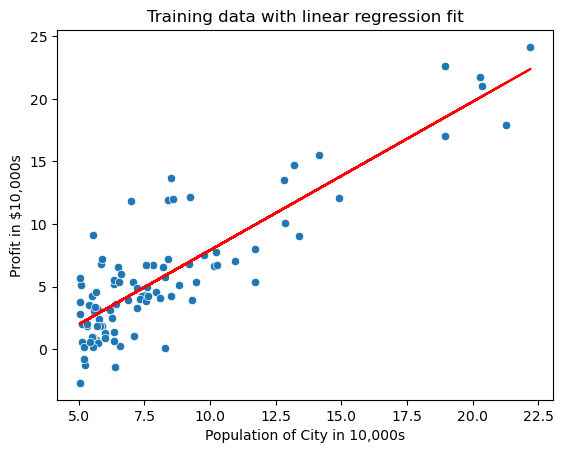

In [15]:
ax = sns.scatterplot(x='population', y='profit', data=df)
plt.plot(X[:,1], X.dot(theta), color='r')
ax.set(xlabel='Population of City in 10,000s', ylabel='Profit in $10,000s', title='Training data with linear regression fit');

In [16]:
y_pred = np.array([1, 3.5]).dot(theta)
f'For population = 35,000, we predict a profit of {y_pred[0]*10000}'

'For population = 35,000, we predict a profit of 2210.459527690749'

In [17]:
y_pred = np.array([1, 7]).dot(theta)
f'For population = 70,000, we predict a profit of {y_pred[0]*10000}'

'For population = 70,000, we predict a profit of 43685.30910994783'

In [18]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

In [19]:
J_vals = np.zeros(shape=(len(theta0_vals), len(theta1_vals)))

In [20]:
for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        J_vals[i,j] = compute_cost_one_variable(X, y, [[theta0_vals[i]], [theta1_vals[j]]])

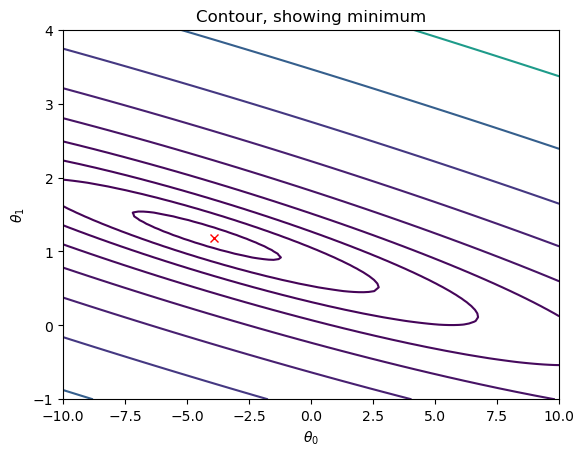

In [21]:
ax = plt.contour(theta0_vals, theta1_vals, np.transpose(J_vals), levels=np.logspace(-2,3,20))
plt.plot(theta[0,0], theta[1,0], marker='x', color='r');
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'$\theta_1$');
plt.title('Contour, showing minimum');

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df.population.values.reshape(-1,1), 
            df.profit.values.reshape(-1,1))

LinearRegression()

In [23]:
lin_reg.intercept_, lin_reg.coef_

(array([-4.21150401]), array([[1.21354725]]))